# Meteorite landings analyse
This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings from 860 to 2013.

This dataset was downloaded from the NASA site dedicated to open data at the address: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("meteorite_ds.csv")

## Dataset exploration

In [63]:
df.shape

(45716, 10)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [65]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


### Data recorded in the future ?
A meteorite seems to have been recorded during the year 2101...

In [66]:
# Minimum year
df['year'].min()

860.0

In [67]:
# Maximum year
df['year'].max()

2101.0

In [68]:
df.loc[df['year'] == 2101.0]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.0, 0.0)"


This seems to be a mistake, but for the most superstitious, this meteorite should only weigh 55 grams

## Delete rows with missing data
In order to compose only with complete data we choose to delete the rows of the dataframe including missing data

In [69]:
# The raw dataframe has : 
# 45716 rows and 10 columns
shape_before = df.shape
shape_before

(45716, 10)

In [70]:
# Delete all rows with at least one missing data
df = df.dropna()

In [71]:
# New dimension is :
# 38115 row and 10 columns
shape_after = df.shape
shape_after

(38115, 10)

In [72]:
# Total rows deleted
deleted_rows = shape_before[0] - shape_after[0]
deleted_rows_percent = round((deleted_rows/shape_before[0]) * 100, 2)
print(f"Rows before : {shape_before[0]}, rows after : {shape_after[0]}")
print(f"Deleted rows : {deleted_rows} ({deleted_rows_percent}%)")

Rows before : 45716, rows after : 38115
Deleted rows : 7601 (16.63%)


This operation caused us to lose more than 16% of the data in the dataset (which is significant) but in return we have the assurance of having complete data on which to rely.

## First visualisations

In [73]:
# How many occurences by year ?
years_val = df['year'].value_counts()
years_val

1979.0    3045
1988.0    2295
1998.0    2147
2003.0    1754
2006.0    1616
          ... 
1583.0       1
1723.0       1
1740.0       1
1833.0       1
1792.0       1
Name: year, Length: 253, dtype: int64

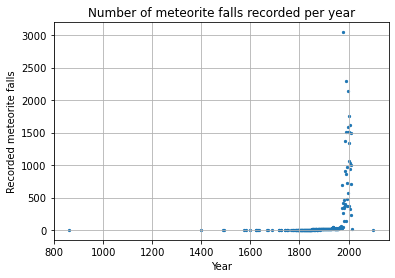

In [74]:
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 5)
plt.title('Number of meteorite falls recorded per year')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()

The graph above reveals that almost all of the data recorded are between the years 1600 and 2000 (with a significant peak from the 80s, certainly due to the growing popularity of computers in the field of scientific research). We choose to reduce the dataset so as to remain in this time interval, in order to take advantage of a greater data density.

In [75]:
# We only retain data recorded between 1600 and 2010
df = df.loc[(df['year'] >= 1970) & (df['year'] <= 2013)]

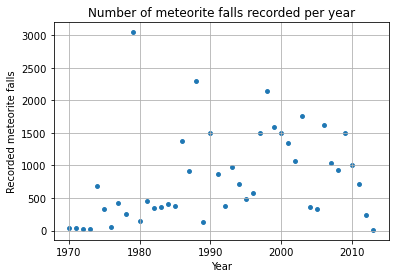

In [82]:
years_val = df['year'].value_counts()
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 15)
plt.title('Number of meteorite falls recorded per year')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()

In [77]:
df['mass (g)'].describe().round(2)

count      35901.00
mean        1483.01
std        40823.51
min            0.00
25%            6.10
50%           24.80
75%          133.10
max      4000000.00
Name: mass (g), dtype: float64

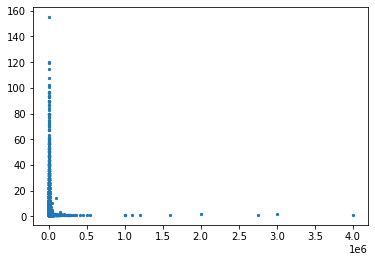

In [78]:
mass_val = df['mass (g)'].value_counts()
x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 5)

Text(0, 0.5, 'Quantity counted')

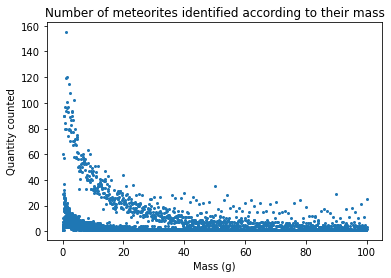

In [79]:
df_mass = df.loc[(df['mass (g)'] > 0) & (df['mass (g)'] <= 100)]
mass_val = df_mass['mass (g)'].value_counts()

x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 4)
plt.title('Number of meteorites identified according to their mass')
plt.xlabel('Mass (g)')
plt.ylabel('Quantity counted')